DYNAMIC MOVEMENT ANALYSIS: Finger-to-Target Task (40 cm)
Metrics for Neurological Assessment of Cerebellar Ataxia
Metric                    Normal          Ataxia (Severe)
----------------------------------------------------------------------
Endpoint Error (cm)       0.34            17.59          
Path Length (cm)          54.50           133.25         
Straightness Index        0.726           0.200          
Movement Time (s)         0.79            2.80           
Peak Velocity (cm/s)      163.1           853.0          
Velocity Zero-Crossings   17              60             

Clinical Interpretation:
• Straightness Index: ~1.0 = efficient; <0.8 suggests ataxia.
• Velocity Zero-Crossings: >2 indicates decomposition of movement.
• Endpoint Error > 2–3 cm at 40 cm is abnormal.
• Prolonged movement time & erratic speed confirm cerebellar dysfunction.


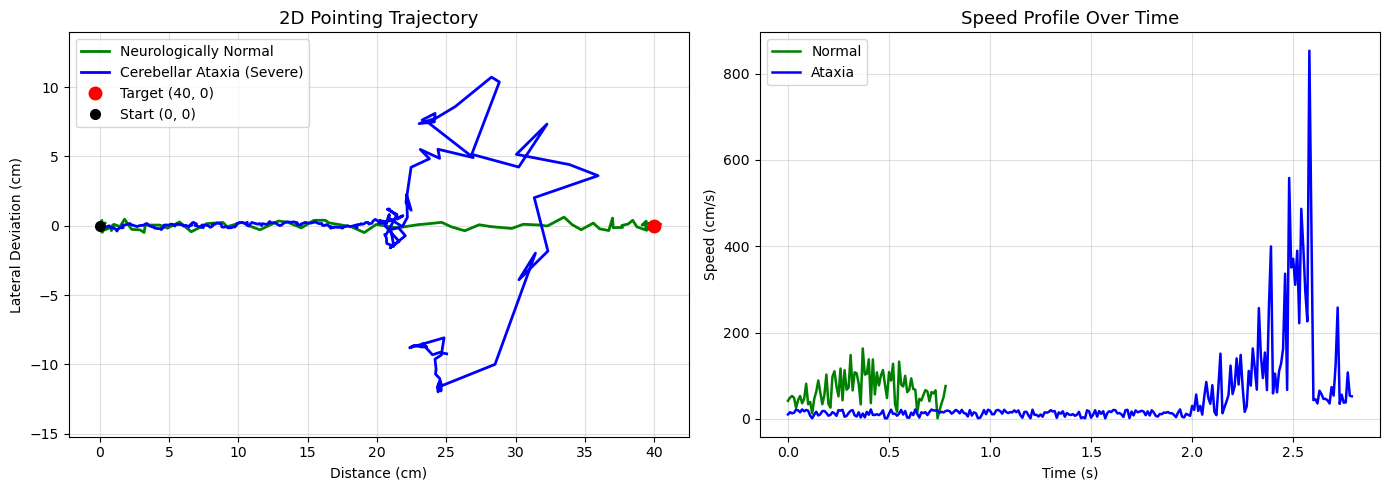

In [12]:
# Human Motor Control: Ataxia vs Normal Trajectory Analysis
# Mehdi Delrobaei - Oct. 2025

import numpy as np
import matplotlib.pyplot as plt

def minimum_jerk_trajectory(start, target, duration=0.8, dt=0.01):
    """Generate smooth, biologically plausible human reaching movement."""
    t = np.arange(0, duration, dt)
    T = duration
    s = 10 * (t / T)**3 - 15 * (t / T)**4 + 6 * (t / T)**5
    traj = np.outer(1 - s, start) + np.outer(s, target)
    return traj

def simulate_normal_pointing(start=(0, 0), target=(40, 0), noise_amp=0.25, dt=0.01):
    """Simulate natural pointing with minor physiological tremor."""
    traj = minimum_jerk_trajectory(np.array(start), np.array(target), duration=0.8, dt=dt)
    tremor = np.random.normal(0, noise_amp, traj.shape)
    return traj + tremor

def simulate_ataxia_pointing(start=(0, 0), target=(40, 0), severity=0.93, dt=0.01):
    """Simulate severe cerebellar ataxia: dysmetria, tremor, decomposition."""
    target = np.array(target, dtype=float)
    current = np.array(start, dtype=float)
    trajectory = [current.copy()]
    total_steps = int(2.8 / dt)
    
    for i in range(total_steps):
        to_target = target - current
        dist = np.linalg.norm(to_target)
        if dist < 0.3 and i > 50:
            break
        
        direction = to_target / (dist + 1e-8)
        base_speed = 22 * dt
        
        # Decomposition: frequent pauses and speed fluctuations
        if np.random.rand() < 0.15 * severity:
            speed = base_speed * np.random.uniform(0.05, 0.25)
        else:
            speed = base_speed * np.random.uniform(0.3, 1.0)
        
        # Dysmetria: directional noise increases near target
        proximity = min(1.0, 30.0 / (dist + 1e-3))
        dir_noise = np.random.normal(0, severity * proximity * 0.7, 2)
        move_dir = direction + dir_noise
        move_dir /= np.linalg.norm(move_dir) + 1e-6
        
        # Intention tremor: amplitude surges near target
        tremor_amp = severity * (1 - np.exp(-max(0, 20 - dist) / 6)) * 3.5
        tremor = np.random.normal(0, tremor_amp, 2)
        
        current += move_dir * speed + tremor
        trajectory.append(current.copy())
    
    return np.array(trajectory)

def compute_metrics(traj, target, dt):
    """Compute dynamic kinematic metrics from 2D trajectory."""
    if len(traj) < 2:
        return {
            'path_length': 0.0,
            'endpoint_error': np.linalg.norm(traj[0] - np.array(target)) if len(traj) > 0 else float('inf'),
            'straightness': 0.0,
            'movement_time': 0.0,
            'peak_velocity': 0.0,
            'velocity_zero_crossings': 0
        }
    
    diffs = np.diff(traj, axis=0)
    path_length = np.sum(np.linalg.norm(diffs, axis=1))
    displacement = np.linalg.norm(traj[-1] - traj[0])
    straightness = displacement / path_length if path_length > 0 else 0.0
    endpoint_error = np.linalg.norm(traj[-1] - np.array(target))
    movement_time = (len(traj) - 1) * dt
    
    velocities = diffs / dt
    speed = np.linalg.norm(velocities, axis=1)
    peak_velocity = np.max(speed) if len(speed) > 0 else 0.0
    vel_x = velocities[:, 0]
    zero_crossings = int(np.sum((vel_x[:-1] * vel_x[1:]) < 0))
    
    return {
        'path_length': float(path_length),
        'endpoint_error': float(endpoint_error),
        'straightness': float(straightness),
        'movement_time': float(movement_time),
        'peak_velocity': float(peak_velocity),
        'velocity_zero_crossings': zero_crossings
    }

# ----------------------------
# Main Execution
# ----------------------------
if __name__ == "__main__":
    np.random.seed(42)  # For reproducible results
    
    start = (0, 0)
    target = (40, 0)  # 40 cm: realistic clinical distance
    dt = 0.01  # Time step (seconds)
    
    # Simulate movements
    normal_traj = simulate_normal_pointing(start, target, noise_amp=0.25, dt=dt)
    ataxic_traj = simulate_ataxia_pointing(start, target, severity=0.93, dt=dt)
    
    # Compute metrics
    normal_metrics = compute_metrics(normal_traj, target, dt)
    ataxic_metrics = compute_metrics(ataxic_traj, target, dt)
    
    # Print clinical report
    print("=" * 70)
    print("DYNAMIC MOVEMENT ANALYSIS: Finger-to-Target Task (40 cm)")
    print("Metrics for Neurological Assessment of Cerebellar Ataxia")
    print("=" * 70)
    print(f"{'Metric':<25} {'Normal':<15} {'Ataxia (Severe)':<15}")
    print("-" * 70)
    print(f"{'Endpoint Error (cm)':<25} {normal_metrics['endpoint_error']:<15.2f} {ataxic_metrics['endpoint_error']:<15.2f}")
    print(f"{'Path Length (cm)':<25} {normal_metrics['path_length']:<15.2f} {ataxic_metrics['path_length']:<15.2f}")
    print(f"{'Straightness Index':<25} {normal_metrics['straightness']:<15.3f} {ataxic_metrics['straightness']:<15.3f}")
    print(f"{'Movement Time (s)':<25} {normal_metrics['movement_time']:<15.2f} {ataxic_metrics['movement_time']:<15.2f}")
    print(f"{'Peak Velocity (cm/s)':<25} {normal_metrics['peak_velocity']:<15.1f} {ataxic_metrics['peak_velocity']:<15.1f}")
    print(f"{'Velocity Zero-Crossings':<25} {normal_metrics['velocity_zero_crossings']:<15} {ataxic_metrics['velocity_zero_crossings']:<15}")
    print("=" * 70)
    print("\nClinical Interpretation:")
    print("• Straightness Index: ~1.0 = efficient; <0.8 suggests ataxia.")
    print("• Velocity Zero-Crossings: >2 indicates decomposition of movement.")
    print("• Endpoint Error > 2–3 cm at 40 cm is abnormal.")
    print("• Prolonged movement time & erratic speed confirm cerebellar dysfunction.")
    
    # Plot results
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    
    # Trajectory plot
    axs[0].plot(normal_traj[:, 0], normal_traj[:, 1], 'g-', linewidth=2, label='Neurologically Normal')
    axs[0].plot(ataxic_traj[:, 0], ataxic_traj[:, 1], 'b-', linewidth=2, label='Cerebellar Ataxia (Severe)')
    axs[0].plot(target[0], target[1], 'ro', markersize=9, label='Target (40, 0)')
    axs[0].plot(start[0], start[1], 'ko', markersize=7, label='Start (0, 0)')
    axs[0].set_title('2D Pointing Trajectory', fontsize=13)
    axs[0].set_xlabel('Distance (cm)')
    axs[0].set_ylabel('Lateral Deviation (cm)')
    axs[0].legend()
    axs[0].grid(True, alpha=0.4)
    axs[0].axis('equal')
    
    # Speed profile
    time_norm = np.arange(len(normal_traj) - 1) * dt
    time_atax = np.arange(len(ataxic_traj) - 1) * dt
    speed_norm = np.linalg.norm(np.diff(normal_traj, axis=0), axis=1) / dt
    speed_atax = np.linalg.norm(np.diff(ataxic_traj, axis=0), axis=1) / dt
    
    axs[1].plot(time_norm, speed_norm, 'g-', linewidth=1.8, label='Normal')
    axs[1].plot(time_atax, speed_atax, 'b-', linewidth=1.8, label='Ataxia')
    axs[1].set_title('Speed Profile Over Time', fontsize=13)
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Speed (cm/s)')
    axs[1].legend()
    axs[1].grid(True, alpha=0.4)
    
    plt.tight_layout()
    plt.show()